In [ ]:
!pip install transformers

In [ ]:
import ast
import csv
import itertools
import string
import sys
import time
import torch
import numpy as np
import pandas as pd 
import json
import random
import time
import ast
import argparse
from collections import defaultdict

# A. Data Preprocessing

In [ ]:
import pandas as pd
from ast import literal_eval

# Data Visualization
train = pd.read_csv("tsd_train.csv")
train["spans"] = train.spans.apply(literal_eval)
print("Train Data Example")
train.head(5)

Train Data Example


,spans,text
0,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...",Another violent and aggressive immigrant killi...
1,"[33, 34, 35, 36, 37, 38, 39]","I am 56 years old, I am not your fucking junio..."
2,"[0, 1, 2, 3]","Damn, a whole family. Sad indeed."
3,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]",What a knucklehead. How can anyone not know th...
4,"[32, 33, 34, 35, 36, 37, 38]","""who do you think should do the killing?""\n\nA..."


In [ ]:
# Data Visualization
trial = pd.read_csv("tsd_trial.csv")
trial["spans"] = trial.spans.apply(literal_eval)
print("Test Data Example")
trial.head(5)

Test Data Example


,spans,text
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...
1,"[29, 30, 31, 32, 33, 34]",How about we stop protecting idiots and let na...
2,"[166, 167, 168, 169, 170, 171]","If people were smart, they would Boycott th..."
3,"[87, 88, 89, 90, 91, 92]",Trump Claimed that Russia will never invade th...
4,[],As long as your willing to pay a lot more for ...


In [ ]:
# Data Visualization
test = pd.read_csv("tsd_test.csv")
test["spans"] = test.spans.apply(literal_eval)
print("Test Data Example")
test.head(5)

Test Data Example


,spans,text
0,"[84, 85, 86, 87, 88, 89, 90, 91, 133, 134, 135...",That's right. They are not normal. And I am st...
1,"[81, 82, 83, 84, 85, 86]","""Watch people die from taking away their healt..."
2,[],tens years ago i contacted the PDR and suggest...
3,[],The parallels between the ANC and the Sicilian...
4,[],Intel Community: ‘How can we work for a Presid...


# B. F1 Score

In [ ]:
# Referenced by SemEval 2021 Task Organizers' Sample Code: https://github.com/ipavlopoulos/toxic_spans

def f1(predictions, gold):
    """
    F1 (a.k.a. DICE) operating on two lists of offsets (e.g., character).
    >>> assert f1([0, 1, 4, 5], [0, 1, 6]) == 0.5714285714285714
    :param predictions: a list of predicted offsets
    :param gold: a list of offsets serving as the ground truth
    :return: a score between 0 and 1
    """
    if len(gold) == 0:
        return 1 if len(predictions)==0 else 0
    nom = 2*len(set(predictions).intersection(set(gold)))
    denom = len(set(predictions))+len(set(gold))
    return nom/denom

# C. Random Baselines (Trial)



In [ ]:
# build a random baseline (yields offsets at random)
random_baseline = lambda text: [i for i, char in enumerate(text) if random.random()>0.5]

In [ ]:
trial["random_predictions"] = trial.text.apply(random_baseline)
trial["f1_scores"] = trial.apply(lambda row: f1(row.random_predictions, row.spans), axis=1)
trial.head()

,spans,text,random_predictions,f1_scores
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...,"[0, 1, 3, 4, 8, 12, 14, 17, 18, 19, 20, 21, 22...",0.244898
1,"[29, 30, 31, 32, 33, 34]",How about we stop protecting idiots and let na...,"[2, 4, 5, 9, 10, 11, 12, 15, 17, 18, 19, 21, 2...",0.078947
2,"[166, 167, 168, 169, 170, 171]","If people were smart, they would Boycott th...","[2, 3, 4, 6, 8, 9, 12, 14, 15, 17, 19, 22, 28,...",0.094118
3,"[87, 88, 89, 90, 91, 92]",Trump Claimed that Russia will never invade th...,"[0, 2, 3, 4, 7, 10, 11, 13, 15, 17, 19, 20, 22...",0.070175
4,[],As long as your willing to pay a lot more for ...,"[0, 3, 5, 7, 8, 9, 10, 12, 14, 15, 17, 20, 21,...",0.000000


F1 = 0.18 ± 0.01


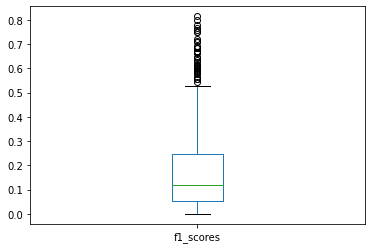

In [ ]:
# Referenced by SemEval 2021 Task Organizers' Sample Code: https://github.com/ipavlopoulos/toxic_spans

from scipy.stats import sem
_ = trial.f1_scores.plot(kind="box")
print (f"F1 = {trial.f1_scores.mean():.2f} ± {sem(trial.f1_scores):.2f}")

# D. Random Baselines (Test)

In [ ]:
test["random_predictions"] = test.text.apply(random_baseline)
test["f1_scores"] = test.apply(lambda row: f1(row.random_predictions, row.spans), axis=1)
test.head()

,spans,text,random_predictions,f1_scores
0,"[84, 85, 86, 87, 88, 89, 90, 91, 133, 134, 135...",That's right. They are not normal. And I am st...,"[1, 2, 4, 7, 10, 14, 15, 22, 25, 26, 28, 29, 3...",0.266667
1,"[81, 82, 83, 84, 85, 86]","""Watch people die from taking away their healt...","[1, 4, 5, 6, 7, 8, 12, 14, 16, 17, 20, 21, 24,...",0.163934
2,[],tens years ago i contacted the PDR and suggest...,"[2, 4, 5, 9, 11, 13, 15, 16, 17, 21, 28, 29, 3...",0.000000
3,[],The parallels between the ANC and the Sicilian...,"[0, 4, 6, 8, 9, 10, 11, 13, 16, 17, 19, 20, 21...",0.000000
4,[],Intel Community: ‘How can we work for a Presid...,"[0, 4, 5, 6, 8, 12, 14, 17, 20, 21, 22, 23, 24...",0.000000


F1 = 0.12 ± 0.00


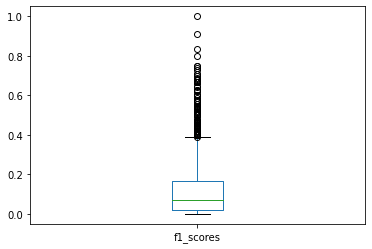

In [ ]:
# Referenced by SemEval 2021 Task Organizers' Sample Code: https://github.com/ipavlopoulos/toxic_spans

from scipy.stats import sem
_ = test.f1_scores.plot(kind="box")
print (f"F1 = {test.f1_scores.mean():.2f} ± {sem(test.f1_scores):.2f}")